In [7]:
# Import
from nn import nn,io,preprocess
import numpy as np
import sklearn
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt

In [2]:
# Get and pre-proecss data
rap1_seqs=io.read_text_file("./data/rap1-lieb-positives.txt")
negative_seqs=io.read_fasta_file("./data/yeast-upstream-1k-negative.fa")

all_seqs=rap1_seqs+negative_seqs
all_bools=[True]*len(rap1_seqs) + [False]*len(negative_seqs)

[seqs, bools]=preprocess.sample_seqs(all_seqs, all_bools)
seqs_one_hot=preprocess.one_hot_encode_seqs(seqs)

X=seqs_one_hot
y=np.array(bools)

In [12]:
len(negative_seqs)

3163

In [3]:
# Sample 80/20 train/test split
train_idx=np.random.randint(0,len(X)-1,int(len(X)*0.8))
train_X=X[train_idx,:]
train_y=y[train_idx].reshape(train_X.shape[0],1)
test_idx=list(set(range(len(X)))-set(train_idx))
test_X=X[test_idx,:]
test_y=y[test_idx].reshape(test_X.shape[0],1)

In [13]:
#Initialize NN
NNet=nn.NeuralNetwork(
    nn_arch=[{'input_dim':X.shape[1],'output_dim':128,'activation':"sigmoid"},
             {'input_dim':128,'output_dim':1,'activation':"sigmoid"}],
             #{'input_dim':64,'output_dim':1,"activation":"sigmoid"}],
    lr=0.0001,
    seed=37,
    batch_size=200,
    epochs=50,
    loss_function="BCE"
)

In [14]:
# Train NN
(train_error,val_error)=NNet.fit(train_X,train_y,test_X,test_y)

Done with iteration 0. Train error: 1.03 Val error: 0.96
Done with iteration 1. Train error: 0.93 Val error: 0.9
Done with iteration 2. Train error: 0.89 Val error: 0.84
Done with iteration 3. Train error: 0.85 Val error: 0.78
Done with iteration 4. Train error: 0.78 Val error: 0.74
Done with iteration 5. Train error: 0.71 Val error: 0.69
Done with iteration 6. Train error: 0.7 Val error: 0.65
Done with iteration 7. Train error: 0.65 Val error: 0.61
Done with iteration 8. Train error: 0.61 Val error: 0.57
Done with iteration 9. Train error: 0.57 Val error: 0.54
Done with iteration 10. Train error: 0.55 Val error: 0.51
Done with iteration 11. Train error: 0.51 Val error: 0.48
Done with iteration 12. Train error: 0.47 Val error: 0.45
Done with iteration 13. Train error: 0.45 Val error: 0.42
Done with iteration 14. Train error: 0.4 Val error: 0.4
Done with iteration 15. Train error: 0.4 Val error: 0.37
Done with iteration 16. Train error: 0.37 Val error: 0.35
Done with iteration 17. Train

Text(0, 0.5, 'Loss')

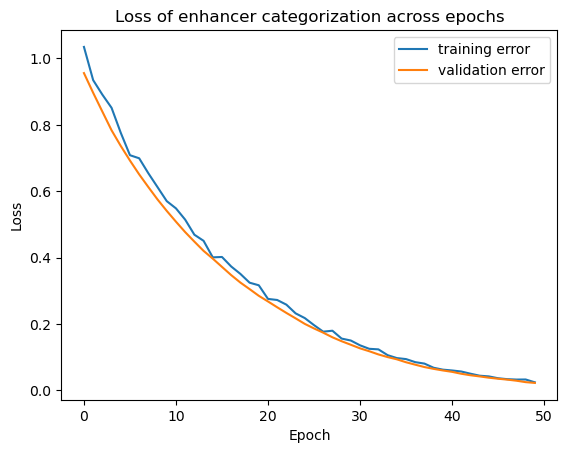

In [16]:
#Plot
plt.plot(range(NNet._epochs),list(train_error))
plt.plot(range(NNet._epochs),list(val_error))
plt.legend(["training error","validation error"])
plt.title("Loss of enhancer categorization across epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

1. Report the accuracy of the classifier:
By the end of 50 epochs, the classifier seems to be able to classify sequences into rap1-binding or non-rap1-binding with about 97% accuracy. This could suggest that there are real trends or motifs that are only present in rap1-binding enhancer regions.
2. Explain your choice of hyperparameters
I chose to make a 2-layer neural net to condense the large number of features into single predictor values for each sequence. I started out with a 3-layer model but saw that the model got down to very low error so I decided to get rid of some neurons. I saw that there were around 3,000 examples, with 137 unique positive sequences and 3,000 negative sequences, so I thought 200 would be a reasonable batch size to train the balanced data on. I tuned the learning rate by training the model at different learning rates and chose the learning rate that allowed the model to converge the best and set the number of epochs as the point at which the model plateaued in error reduction. I chose to use binary cross entropy because this is a classification problem, where binary cross entropy works well to quantify sigmoid-activation based predictions.